In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
np.random.seed(0)

In [3]:
M = 100
N = 5
target_m = np.arange(N).reshape(1, N)
target_b = 7
lr = 0.5
epochs = 50

x = np.random.randn(M*N).reshape(M, N)
y = (target_m.dot(x.T) + target_b).reshape(-1)

In [4]:
def step_gradient(m, b, x, y, lr):
    # forward pass
    _y = m.dot(x.T) + b
    
    # backward pass
    grad_m = np.zeros(N)
    grad_b = 0
    
    for i in range(M):
        _temp = -2*(y[i] - _y[i])
        grad_m += _temp*x[i]
        grad_b += _temp
        
    grad_m /= M
    grad_b /= M
    
    # update
    m = m - lr*grad_m
    b = b - lr*grad_b
    
    # error
    _y = m.dot(x.T) + b
    _error = np.mean((y - _y)**2)
    
    return m, b, _error

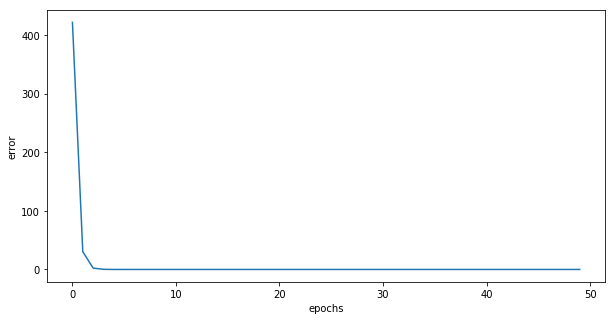

In [5]:
m = np.random.randn(N)
b = random.randint(-M, M)
error = np.zeros(epochs)

for i in range(epochs):
    m, b, error[i] = step_gradient(m, b, x, y, lr) 
    
plt.figure(figsize=[10, 5])
plt.xlabel('epochs')
plt.ylabel('error')
plt.plot(np.arange(epochs), error)

In [6]:
print((target_m - m)/100)
print((target_b - b)/100)

[[-2.50620195e-19  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]]
0.0


In [7]:
m, target_m, b, target_b

(array([2.50620195e-17, 1.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        4.00000000e+00]), array([[0, 1, 2, 3, 4]]), 7.0, 7)